In [1]:
# Twitter Sentiment Analysis on SPY using VADER

In [2]:
import tweepy
import pandas as pd
consumer_key = "dFhoMiB8aIYaBqry5OKMuVEs2"
consumer_secret = "D5CXxn1hwatRd9bEHTJkRAOoFowGyeLnANmpcHW7kmn35iYM0G"
access_token = "1542288001631506436-iaYMHTYTSmx62ZtELOGvF2p7XFQ9ZR"
access_token_secret= "S4spt3ODtDEHETO4wML5CChWx8rAwkj5pv4fobWoV24o9"
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [3]:
search_words = 'stocks S&P 500'  #individually collected tweets for 5 different keywords
tweets = tweepy.Cursor(api.search_full_archive, label="dev", query=search_words, fromDate="202203010100", toDate="202203310100", maxResults="500").items(20000)
tweets

In [4]:
tweet_details = [[tweet.text, tweet.user.screen_name, tweet.user.location,tweet.created_at ] for tweet in tweets]

In [5]:
tweet_df = pd.DataFrame(data=tweet_details, columns=["text","user","location", "date" ])
#saving the dataframe into csv file
tweet_df.to_csv ('tweets_6.csv', index = False, header=True)

In [6]:
import glob
from path import Path
#Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
df_tweets = pd.read_csv(Path('tweets_6.csv'), 
    parse_dates=True, 
    infer_datetime_format=True
)
#display the first 10 tweets
display(df_tweets.head())
display(df_tweets.tail())

,text,user,location,date
0,RT @hussmanjp: So this is fun. The share of ho...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00
1,"RT @TeamofStockTra: Good evening, y’all. Happy...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00
2,"RT @LizYoungStrat: Since 1977, there have been...",wj93224929,NaN,2022-03-31 00:54:33+00:00
3,"Good evening, y’all. Happy Hump Day! 🐪\n\nStoc...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00
4,RT @hussmanjp: So this is fun. The share of ho...,Chazzl3dazzl3,Orange County,2022-03-31 00:47:44+00:00


,text,user,location,date
10583,RT @center_forex: S&amp;amp;P 500 Outlook Clou...,center_forex,Forex trading signal provider,2022-03-01 02:07:09+00:00
10584,Just dropped! Q3 Strategies Portfolio Update!\...,InvestingKev,NaN,2022-03-01 01:45:06+00:00
10585,RT @Travis_Sawchik: There's still time for any...,LeftfieldProf,"Miami, FL",2022-03-01 01:20:34+00:00
10586,The S&amp;P 500 and Nas­daq have lost 8.2% and...,kargadan,Gourev,2022-03-01 01:05:37+00:00
10587,"A ""devastating"" conflict between Russia and Uk...",SchutteFinance,"Colorado, USA",2022-03-01 01:00:50+00:00


In [7]:
df_tweets.shape

(10588, 4)

In [8]:
df_tweets.duplicated(subset=['text']).sum()
df_tweets=df_tweets.drop_duplicates(subset=['text'])
df_tweets.shape

(5564, 4)

In [9]:
import re
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in df_tweets dataframe
df_tweets['text'] = df_tweets['text'].apply(lambda x:tweet_cleaner(x))

In [10]:
#downloading the vader lexicon from nltk
import nltk
nltk.download('vader_lexicon')
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
df_tweets['scores'] = df_tweets['text'].apply(lambda text: sid.polarity_scores(text))
df_tweets.head(10)

,text,user,location,date,scores
0,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp..."
1,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp..."
2,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp..."
7,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp..."
17,📢Update on S&amp;P 500 momentum stocks 📈Stock ...,TradeInMomentum,NaN,2022-03-31 00:03:53+00:00,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp..."
18,Tesla is one of only 11 stocks in the S&amp;P ...,bungobot1,In your book,2022-03-31 00:02:07+00:00,"{'neg': 0.106, 'neu': 0.566, 'pos': 0.328, 'co..."
20,Berkshire Hathaway is up +20.01% year to date ...,TheTechTraders,NaN,2022-03-31 00:00:23+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
28,5 of the Best Canadian S&amp;P 500 ETFS to Own...,StockTrades_CA,Calgary Alberta Canada,2022-03-30 23:37:14+00:00,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp..."
31,Tesla is one of only 11 stocks in the S&amp;P ...,techpearce2,"Manchester, England",2022-03-30 23:35:05+00:00,"{'neg': 0.106, 'neu': 0.566, 'pos': 0.328, 'co..."


In [12]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05: 
        return "Negative"
    else:
        return "Neutral"

    
final_df = df_tweets
final_df['label'] = df_tweets['scores'].apply(lambda x: sentimentPredict(x))

display(final_df.head())
display(final_df.tail())

,text,user,location,date,scores,label
0,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",Positive
1,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Positive
2,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",Positive
7,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",Positive


,text,user,location,date,scores,label
10582,The S&amp;P 500 ended lower after a volatile s...,Reuters,Around the world,2022-03-01 02:15:00+00:00,"{'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'comp...",Negative
10583,S&amp;amp;P 500 Outlook Clouded by Russian SWI...,center_forex,Forex trading signal provider,2022-03-01 02:07:09+00:00,"{'neg': 0.313, 'neu': 0.522, 'pos': 0.165, 'co...",Negative
10584,Just dropped! Q3 Strategies Portfolio Update! ...,InvestingKev,NaN,2022-03-01 01:45:06+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
10586,The S&amp;P 500 and Nas­daq have lost 8.2% and...,kargadan,Gourev,2022-03-01 01:05:37+00:00,"{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'comp...",Negative
10587,"A ""devastating"" conflict between Russia and Uk...",SchutteFinance,"Colorado, USA",2022-03-01 01:00:50+00:00,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'comp...",Negative


In [13]:
# https://prastuti.medium.com/twitter-sentiment-analysis-on-covid-19-using-vader-82f030b686a9

C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

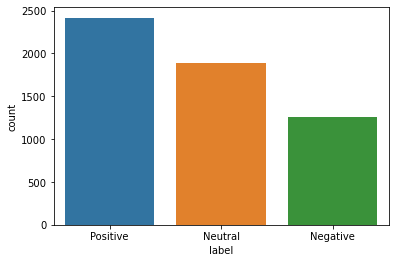

In [14]:
import seaborn as sns
sns.countplot(final_df['label'], label='count')